# 1. Train and test the data

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pandas as pd
import graphviz

# Load Data
players = pd.read_csv('players.csv', index_col=[0])
x = players.drop(columns=['result'])
y = players['result']

# split train 70% and test 30%
X_train, X_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.3, random_state=0)

# Initialize classifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rf.score(X_test, y_test)

0.9046666666666666

# 2. Find the Error

In [2]:
df = pd.DataFrame(columns=[*x.columns.values, 'predict', 'target'])
for i in range(len(y_test)):
    if y_pred[i] != y_test.to_numpy()[i]:
        data = [*x.loc[i].to_numpy(), y_pred[i], y_test.to_numpy()[i]]
        df.loc[len(df)] = data

df

,2B,3B,HR,H,PA,BB,HBP,SF,G,AB,...,SAC,XBH,GDP,GO,AO,GOAO,NP,score,predict,target
0,44.0,19.0,40.0,238.0,574.0,114.0,21.0,10.0,148.0,574.0,...,6.0,103.0,27.0,53.0,149.0,0.356,1757.0,5.626502,2.0,1.0
1,14.0,19.0,39.0,238.0,427.0,101.0,2.0,14.0,146.0,427.0,...,15.0,72.0,14.0,57.0,3.0,19.000,2089.0,5.264166,2.0,0.0
2,39.0,18.0,47.0,262.0,368.0,98.0,4.0,12.0,91.0,368.0,...,15.0,104.0,6.0,144.0,17.0,8.471,874.0,5.199430,2.0,0.0
3,59.0,4.0,58.0,224.0,716.0,100.0,39.0,4.0,58.0,716.0,...,8.0,121.0,3.0,134.0,37.0,3.622,3226.0,5.112880,2.0,0.0
4,54.0,19.0,56.0,199.0,665.0,101.0,4.0,5.0,58.0,665.0,...,6.0,129.0,15.0,105.0,124.0,0.847,455.0,5.087615,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,30.0,3.0,39.0,254.0,329.0,76.0,31.0,4.0,136.0,329.0,...,9.0,72.0,19.0,35.0,110.0,0.318,2796.0,3.899333,2.0,0.0
282,24.0,8.0,60.0,184.0,602.0,77.0,30.0,10.0,146.0,602.0,...,13.0,92.0,3.0,42.0,207.0,0.203,3256.0,3.897597,2.0,0.0
283,41.0,11.0,40.0,144.0,284.0,48.0,12.0,14.0,105.0,284.0,...,15.0,92.0,13.0,98.0,69.0,1.420,1883.0,3.894614,2.0,0.0
284,57.0,1.0,37.0,195.0,532.0,105.0,4.0,2.0,154.0,532.0,...,6.0,95.0,13.0,122.0,152.0,0.803,568.0,3.891419,1.0,2.0


# 3. Generate Random Forest Graph

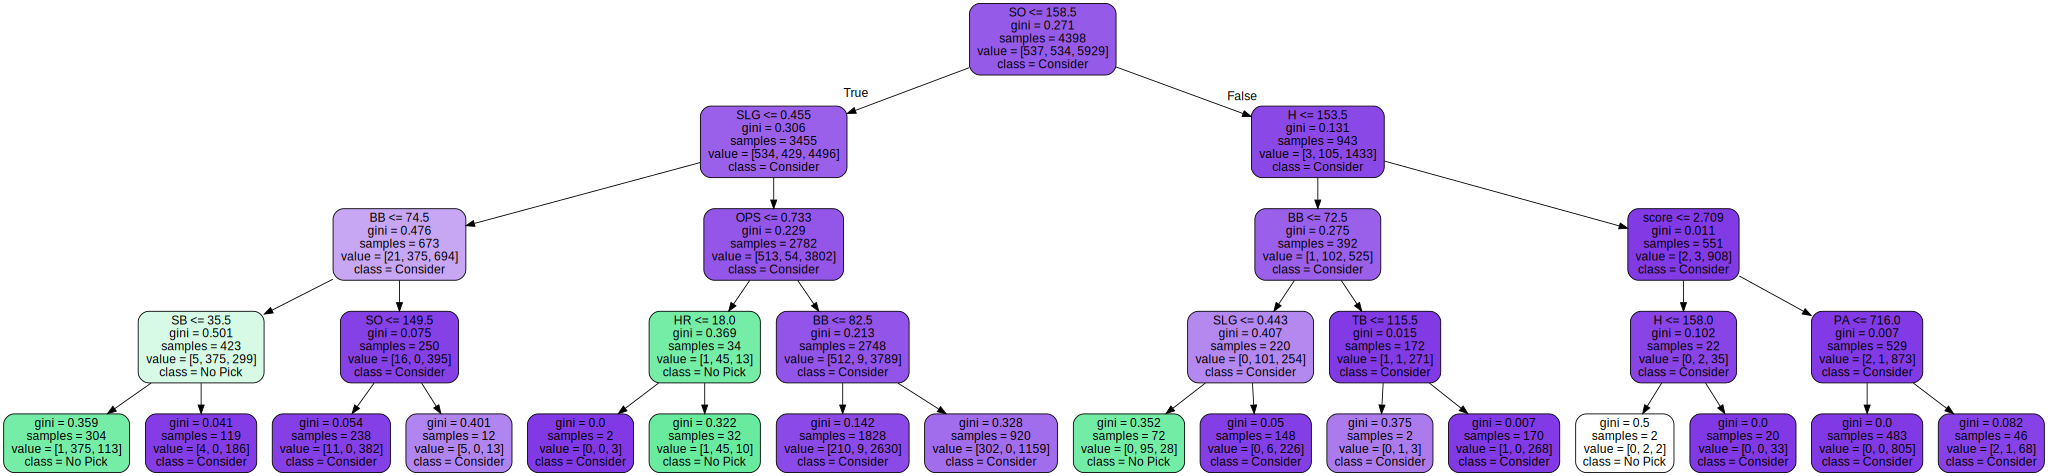

In [3]:

# rf.estimators_[0] 代表產出 forest 中的第 0 棵樹
dot = export_graphviz(rf.estimators_[0], out_file=None,
                      feature_names=x.columns.values,
                      class_names=['Pick', 'No Pick', 'Consider'], filled=True, rounded=True)

graph = graphviz.Source(dot)
graph
# [est.score(test_data, test_target) for est in rf.estimators_]